Back to the main [Index](../index.ipynb)

In [1]:
# Use %matplotlib if you are running in the ipython shell.
%matplotlib notebook

from abipy.lessons.lesson_dos_bands import Lesson
lesson = Lesson()
lesson

The calculation of the density of states and the bandstructure
==============================================================

Background
----------

This lesson focuses on the calculation of density of states (DOSes) and
of electronic band structures within the Kohn-Sham (KS) formalism.

In contrast to the total energy and its derivatives, the energies of the KS levels have no physical meaning,
except for the highest occupied state that actually would be the first ionization energy if the DFT XC functional would be
exact. So why do we use the KS formalism to calculate electron DOSes and band structures?

As a matter of fact, the KS energy spectrum is usually in qualitative agreement with experiments (let's ignore correlated systems).
Standard KS band structures with LDA or GGA are relatively cheap and KS calculations allow us to make
reasonable predictions and to study trends.
In `lesson_g0w0.py`, we discuss a more accurate and expensive approach for the calculation of band structures and band gaps
based on many-body perturbation theory.

The related abinit variables
----------------------------

    * kptopt    (negative values if band structures are wanted)
    * kptbounds (the boundaries of the k-path)
    * ndivsm    (number of points used to sample the smallest segment of the k-path)


More info on the input variables and their use can be obtained with the command:

    .. code-block:: python

        print(lesson.docvar("inputvariable"))

that prints the official description of `inputvariable`.


Description of the lesson
-------------------------

The flow used  in this lesson contains, for the first time, dependencies.
This means that some of the tasks in the flow can start only if its `parents` are completed.
We will first perform a self-consistent calculation to obtain a well converged density.
From this density we then calculate the DOS and the bandstructure in two independent tasks (non-self consistent calculations).
Note that the DOS is computed on a regular grid of k-points because the DOS requires an integration over the first Brillouin zone.
For the band structure, we use a high symmetry path inside the BZ.

Start this lesson by importing it in a new namespace:

    .. code-block:: python

        from abipy.lessons.lesson_dos_bands import Lesson
        lesson = Lesson()

As usual, you can reread this text using the command:

    .. code-block:: python

        lesson

To build the flow:

    .. code-block:: python

        flow = lesson.make_flow()

To print the input files:

    .. code-block:: python

        flow.show_inputs()

To visualize the dependencies in the flow:

    .. code-block:: python

        flow.show_dependencies()

Start the flow with the scheduler and wait for completion.

    .. code-block:: python

        flow.make_scheduler().start()

To analyze the results.

    .. code-block:: python

        lesson.analyze(flow)

Exercises
---------

At this point, you may want to interact more with the underlying python objects
so that you can start to develop your script or your post-processing tools.

Our flow consists of a `BandStructureWork` object that provides many tools for the post-processing.
Use

    .. code-block:: python

            work = flow[0]

to access the band structure work and look at the `plot` methods that
are available (hint: type work.plot in ipython and press TAB to get a list of methods)

1) Use the `plot_` methods to visualize the convergence of the DOS wrt to the number of k-points.
   Then change the value of the gaussian broadening (`width` parameter).

2) Plot bands and DOS on the same figure.

Remember that, in ipython, one can access the documentation with `work.plot_edoses?`

Next
----

A logical next lesson would be lesson_g0w0

Examples
--------

Build the flow:

In [2]:
flow = lesson.make_flow()

/Users/gmatteo/git_repos/pymatgen/pymatgen/symmetry/bandstructure.py:61: UserWarning: The input structure does not match the expected standard primitive! The path can be incorrect. Use at your own risk.
  warnings.warn("The input structure does not match the expected standard primitive! "


Show inputs:

In [3]:
flow.show_inputs()



<ScfTask, node_id=81288, workdir=flow_dos_bands/w0/t0>
############################################################################################
#                                      SECTION: varbas                                      
############################################################################################
 ecut 10
 tolvrs 1e-09
 kptopt 1
 shiftk 0 0 0
 ngkpt 4 4 4
 nshiftk 1
############################################################################################
#                                         STRUCTURE                                         
############################################################################################
 acell    1.0    1.0    1.0
 xred
    0.0000000000    0.0000000000    0.0000000000
    0.2500000000    0.2500000000    0.2500000000
 rprim
    6.3285005272    0.0000000000    3.6537614829
    2.1095001757    5.9665675167    3.6537614829
    0.0000000000    0.0000000000    7.3075229659
 typat 1 1
 natom 2
 ntypat 

The `NscfTasks` depend on the initial ScfTask via the DEN file

<IPython.core.display.Javascript object>


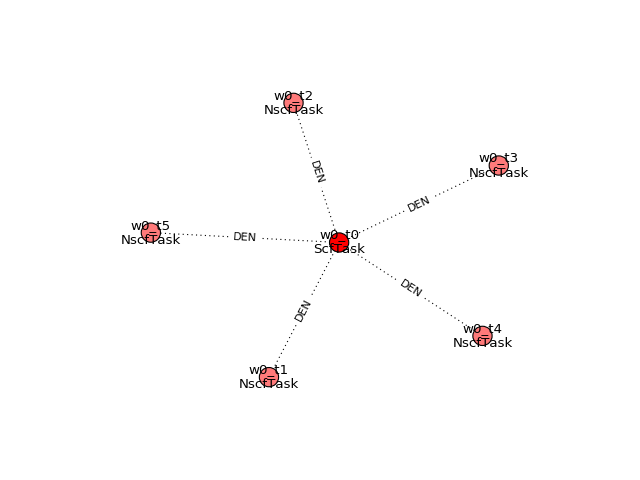

In [4]:
flow.plot_networkx(with_edge_labels=True)

Run the flow with:

In [5]:
%%capture
flow.make_scheduler().start()

0

To analyze the results:

<IPython.core.display.Javascript object>


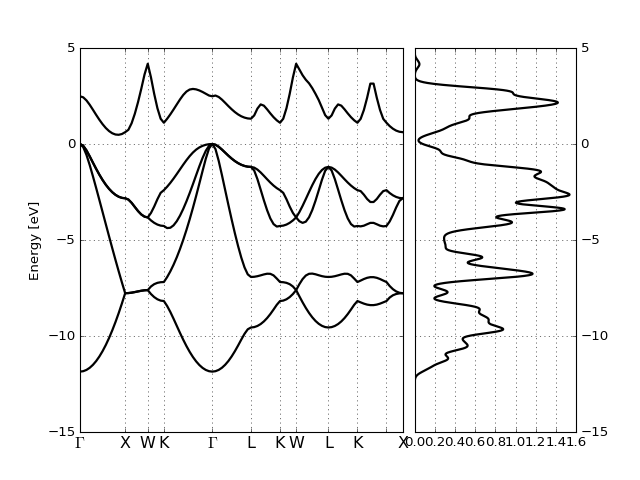

In [7]:
fig = lesson.analyze(flow)

`lesson.analyze` is handy for beginners but in real life one has to interact 
with the python objects to accomplish a given task.
In the section below, we will expliclty use the abipy API to plot the band energies:

In [8]:
# Extract the first Workflow
work = flow[0]

# list all plot methods of this object (can also use `work.plot` + TAB)
print(work)
for method in dir(work):
    if method.startswith("plot"):
        print(method)

<BandStructureWork, node_id=81287, workdir=flow_dos_bands/w0>
plot_ebands
plot_ebands_with_edos
plot_edoses


`plot_ebands_with_edos` seems interesting. Let's have a look at the docstring:

In [9]:
help(work.plot_ebands_with_edos)

Help on method plot_ebands_with_edos in module pymatgen.io.abinit.works:

plot_ebands_with_edos(self, dos_pos=0, method=u'gaussian', step=0.01, width=0.1, **kwargs) method of pymatgen.io.abinit.works.BandStructureWork instance
    Plot the band structure and the DOS.
    
    Args:
        dos_pos: Index of the task from which the DOS should be obtained (note: 0 refers to the first DOS task).
        method: String defining the method for the computation of the DOS.
        step: Energy step (eV) of the linear mesh.
        width: Standard deviation (eV) of the gaussian.
        kwargs: Keyword arguments passed to `plot_with_edos` method to customize the plot.
    
    Returns:
        `matplotlib` figure.



This means that we can call directly the methods of the work to get our band structure

<IPython.core.display.Javascript object>


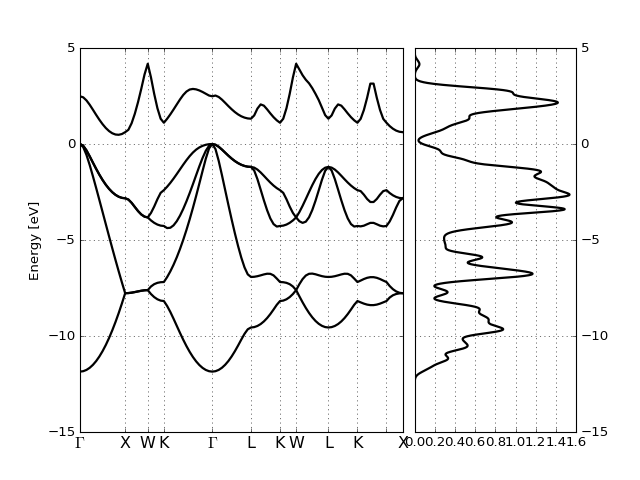

In [10]:
# To plot the bands with the DOS with ngkpt = (2,2,2)
work.plot_ebands_with_edos(width=0.2, dos_pos=1)

<IPython.core.display.Javascript object>


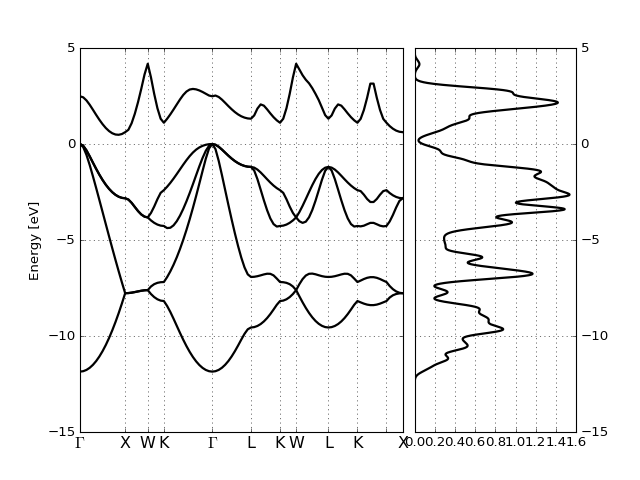

In [11]:
# To plot the bands with the DOS with ngkpt = (8, 8, 8)
work.plot_ebands_with_edos(width=0.2, dos_pos=3)

`workplot_edoes` allows us to compare the DOSes computed with different number of $k$-points:

In [12]:
help(work.plot_edoses)

Help on method plot_edoses in module pymatgen.io.abinit.works:

plot_edoses(self, dos_pos=None, method=u'gaussian', step=0.01, width=0.1, **kwargs) method of pymatgen.io.abinit.works.BandStructureWork instance
    Plot the band structure and the DOS.
    
    Args:
        dos_pos: Index of the task from which the DOS should be obtained.
                 None is all DOSes should be displayed. Accepts integer or list of integers.
        method: String defining the method for the computation of the DOS.
        step: Energy step (eV) of the linear mesh.
        width: Standard deviation (eV) of the gaussian.
        kwargs: Keyword arguments passed to `plot` method to customize the plot.
    
    Returns:
        `matplotlib` figure.



<IPython.core.display.Javascript object>


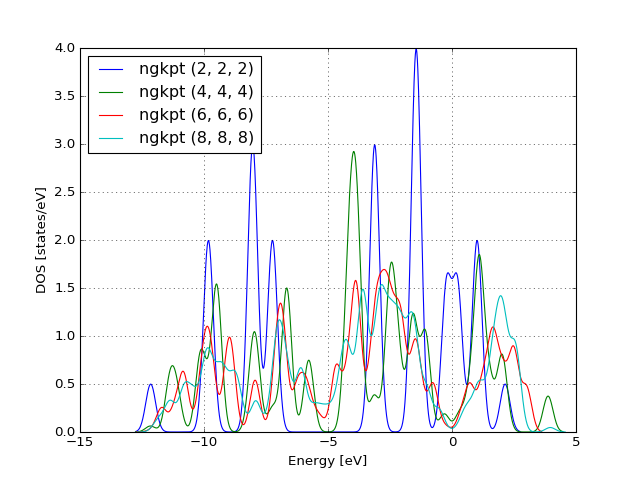

In [17]:
fig = work.plot_edoses(width=0.2)

It's clear that `(2, 2, 2)` and `(4, 4, 4)` are not converged. Let's focus on the last two meshes: 

<IPython.core.display.Javascript object>


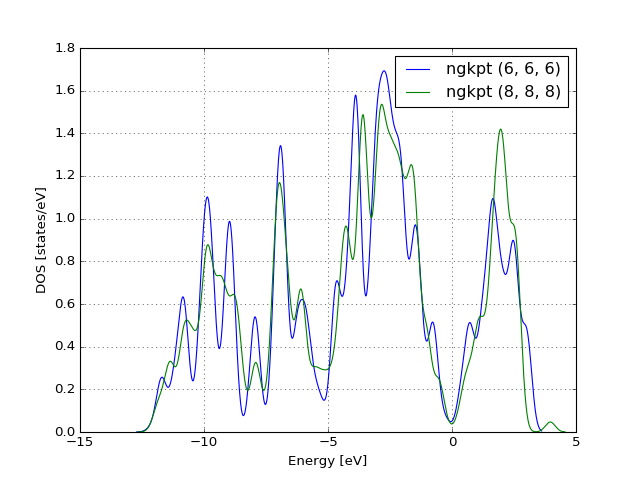

In [15]:
fig = work.plot_edoses(width=0.2, dos_pos=[2, 3])

Also `(6, 6, 6)` and `(8, 8, 8)` are not converged. Indeed if we descrease the gaussian width: 

<IPython.core.display.Javascript object>


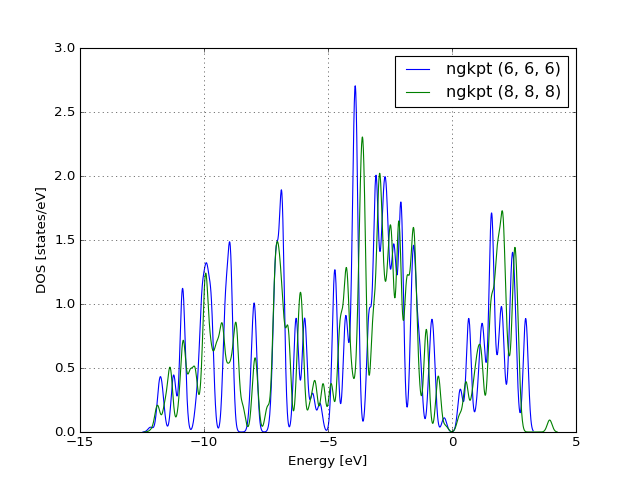

In [16]:
fig = work.plot_edoses(width=0.1, dos_pos=[2, 3])